Generate smiles string with minGPT
* import
* read dataset with smiles strings
    * need to create a meta file somehow ?
        * smiles itself
        * raw formula
        * properties
        * train/test split, if not already available
    * filter molecules based on stuff once we have the meta information
* EDA:
    * once the meta is here
* data loader
    * tokeniser ?
    * stoi/itos
    * phase ?
* model
    * straightforward for the moment
    * later: with properties, will need to cat them with embeddings somehow
* training loop:
    * straighforward from minGPT
    * 
* exploitation
    * need helpers functions
    * look for ratio of valid smiles string generated

## Import

In [4]:
from rdkit import Chem
import pandas as pd
import os
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
import string

In [3]:
def CHNO_only(mol):
    for atom in mol.GetAtoms():
        symb = atom.GetSymbol()
        if symb not in ['C','H','N','O']:
            return False
    return True

def info_from_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    n_atoms = mol.GetNumAtoms()
    MolFormula = CalcMolFormula(mol)
    l = len(smiles)
    CHNO = CHNO_only(mol)
    return pd.Series([n_atoms,MolFormula,l,CHNO])#pd.DataFrame({'n_atoms':n_atoms,'MolFormula':MolFormula,'l':l}, index=[0])


In [2]:
raw_path = '/home/teleport/perso/raw/'
process_path = '/home/teleport/perso/process_10pc/'
data_path = '/home/teleport/perso/'

if not os.path.exists(process_path):
    os.mkdir(process_path)

## Apply the function to all files

In [ ]:
# for i in os.listdir(raw_path):    
#     print(i)
#     data = pd.read_csv(raw_path + i, sep = '\t')
#     data = data[['smiles', 'mwt', 'logp']]
#     data.to_csv(raw_path + i,index = False)

KCCA.txt
HDCD.txt
ECBB.txt
BIAC.txt
GIAC.txt
EGBA.txt
GACB.txt
JIBD.txt


/home/teleport/.conda/envs/pytorch_smiles/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


KKCD.txt
KIAD.txt
FIAA.txt
CABD.txt
GGBC.txt
GAAC.txt
FHAD.txt
HCCD.txt
BJAB.txt
EECC.txt
IKCD.txt
IDBB.txt
DJAA.txt
JFBB.txt
IFAD.txt
BJAA.txt
FHBB.txt
IECB.txt
DFAB.txt
FAAB.txt
ADCC.txt
FFAA.txt
IFCD.txt
BBBD.txt
CDAC.txt
EKAA.txt
ADBA.txt
FKAA.txt
IEAB.txt
JEAC.txt
HBCD.txt
JJBD.txt
FGBB.txt
JDCB.txt
JHBC.txt
BICB.txt
HDAD.txt
KJAD.txt
BIAD.txt
HICD.txt
DGBC.txt
KJCB.txt
DDCD.txt
HAAD.txt
FACA.txt
ECBA.txt
AIAD.txt
KFAD.txt
GDAB.txt
EFAD.txt
EDADaf
JDBD.txt
JECD.txt
HDBB.txt
CKCD.txt
CFAA.txt
GECD.txt
HECD.txt
BEAD.txt
EGBB.txt
HCAB.txt
IAAA.txt
JCBC.txt
EDBD.txt
HGAB.txt
DKBD.txt
FJAA.txt
FIAD.txt
GBCB.txt
HHAB.txt
HJAB.txt
GGAC.txt
GCBA.txt
JKBA.txt
KICD.txt
JJAD.txt
CGBB.txt
GHAC.txt
JICA.txt
CGBA.txt
BIBB.txt
AHAC.txt
IBCD.txt
DDBB.txt
AACB.txt
EJBC.txt
BCCB.txt
IDAA.txt
EAAB.txt
HIBC.txt
FCAB.txt
ECAA.txt
CFCB.txt
DDAB.txt
EGCA.txt
FJBD.txt
BFBC.txt
BICC.txt
ACCD.txt
HCAC.txt
FCBD.txt
EHAD.txt
BBBB.txt
CFBB.txt
IHCB.txt
BCBC.txt
ABBB.txt
ABAC.txt
BAAD.txt
AEBD.txt
KHAD.txt
BEB

In [ ]:
for i in os.listdir(raw_path):
    if not os.path.exists(process_path + i):
        print(i)

        data = pd.read_csv(raw_path + i)
        print(len(data))
        data = data.sample(frac=0.1, replace=False, random_state=1)
        print(len(data))
        if len(data) > 0:
            data = data[['smiles', 'mwt', 'logp']]
            data['has_non_CHNO'] = data['smiles'].str.contains('Br|I|P|F|Cl|S|s|p',regex=True)
            data = data[(data['has_non_CHNO'] == False)].reset_index()
            data = data[['smiles', 'mwt', 'logp']]
            meta = data['smiles'].apply(info_from_smiles)
            meta.columns = ['n_atoms','MolFormula','l','CHNO']

            data = pd.concat([data, meta], axis=1)

            data.to_csv(process_path + i)

GGBC.txt
2
0
GAAC.txt
1
0
EECC.txt
2
0
ADCC.txt
3
0
JEAC.txt
5
0
JHBC.txt
1
0
JCBC.txt
1
0
KICD.txt
3
0
EJBC.txt
2
0
HIBC.txt
3
0
BICC.txt
1
0
HCAC.txt
1
0
BCBC.txt
1
0
CFCC.txt
2
0
KCBC.txt
1
0
ECBC.txt
1
0
CDCC.txt
2
0
EAAC.txt
1
0
KABD.txt
1
0
IJCC.txt
1
0
BABC.txt
1
0
DEBC.txt
3
0
CGCC.txt
2
0
CGBC.txt
4
0
JDCC.txt
1
0
DIBC.txt
2
0
BAAC.txt
5
0
KKCC.txt
1
0
EHBC.txt
1
0
CIBC.txt
1
0
CACC.txt
1
0
AIAC.txt
2
0
BGBC.txt
3
0
BKCA.txt
5
0
FKBC.txt
1
0
JKBC.txt
2
0
AGBD.txt
3
0
AKAA.txt
1
0
EEAD.txt


/home/teleport/.conda/envs/pytorch_smiles/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


35918783
3591878
GGBB.txt
2849
285
JDBC.txt
1
0
ADCB.txt
387
39
CFAD.txt


/home/teleport/.conda/envs/pytorch_smiles/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


11067368
1106737
AJAA.txt
23
2
AGAB.txt
2477
248
EAAA.txt
1271
127
KHAC.txt
38
4
KKBC.txt
4
0
EFAB.txt
72388
7239
DHCB.txt
822
82
FCCD.txt
27817
2782
DFCB.txt
725
72
BGBD.txt
7966
797
EACD.txt
93
9
HJAD.txt


/home/teleport/.conda/envs/pytorch_smiles/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


8264522
826452
DDAD.txt


/home/teleport/.conda/envs/pytorch_smiles/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


28707924
2870792


## combine the files

In [6]:
data = [pd.read_csv(process_path + i) for i in os.listdir(process_path)]
data = pd.concat(data)
data = data[['smiles', 'mwt', 'logp','n_atoms','MolFormula','l','CHNO']]

In [7]:
data = data[(data['CHNO'] == True)].reset_index()

In [8]:

data = data[(data['mwt'] <= 500)]#.reset_index()
data = data[(data['mwt'] > 100)]

In [9]:
data.to_csv(data_path + '/10pc_cleaned.csv',index = False)

## EDA with what we have now

In [7]:
data = pd.read_csv(data_path + '/10pc_cleaned.csv')

In [67]:
data['l_MolFormula'] = data['MolFormula'].apply(len)

In [68]:
data['l_chunk'] = data['l'] + data['l_MolFormula'] + 2

In [70]:
max(data['l_chunk'])

140.0

In [10]:
data

,index,smiles,mwt,logp,n_atoms,MolFormula,l,CHNO
8,0,O=C(CCCC(=O)N1CC(=O)Nc2ccccc21)NCCc1cc(O)c(O)cc1O,413.430,1.618,30.0,C21H23N3O6,49.0,True
9,1,CC(C)(C)OC(=O)N1CCC2(CC1)CN(Cc1c(O)cc(O)cc1O)C...,407.467,1.505,29.0,C20H29N3O6,53.0,True
10,2,COc1cc(CN2CCN(C(=O)[C@H]3COc4ccccc4O3)CC2)c(O)...,414.458,1.894,30.0,C22H26N2O6,53.0,True
11,3,COc1ccc(N2CCN(CCN3C(=O)N[C@@H]([C@@H]4CCCOC4)C...,402.495,1.164,29.0,C21H30N4O4,57.0,True
12,4,CN1CCOc2cc(CN3C[C@@H]4COC[C@@H](C(=O)N5CCCCO5)...,401.507,1.764,29.0,C22H31N3O4,61.0,True
...,...,...,...,...,...,...,...,...
1219120,1068,Cc1nn(C)c(C)c1CN(C(=O)CN1C(=O)NC2(CCCCC2)C1=O)...,387.484,1.783,28.0,C20H29N5O3,51.0,True
1219121,1069,CN(C)c1ccc(NC(=O)CN2[C@H]3CC[C@H]2CC(O)(c2nccn...,383.496,1.939,28.0,C21H29N5O2,55.0,True
1219122,1070,N=C(NCCC[C@H](NC(=O)c1ccccc1)C(=O)O)NC(=O)c1cc...,382.420,1.604,28.0,C20H22N4O4,50.0,True
1219123,1071,CN1CCC[C@@H](c2nnc3n2CCN(C(=O)CCCc2ccccn2)CC3)C1,382.512,1.890,28.0,C21H30N6O,48.0,True


<AxesSubplot:xlabel='l', ylabel='mwt'>

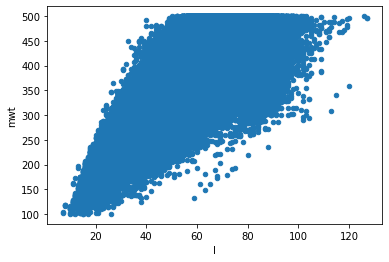

In [8]:
data.plot.scatter('l','mwt')

<AxesSubplot:ylabel='Density'>

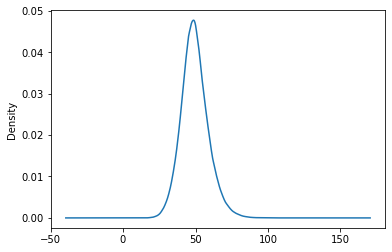

In [14]:
data.sample(frac=0.05, replace=False, random_state=1)['l'].plot.density()

<AxesSubplot:ylabel='Density'>

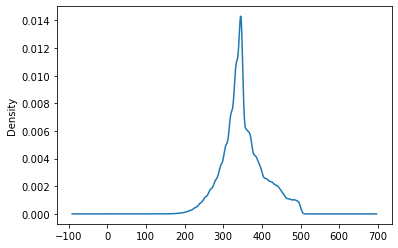

In [10]:
data.sample(frac=0.05, replace=False, random_state=1)['mwt'].plot.density()

<AxesSubplot:ylabel='Density'>

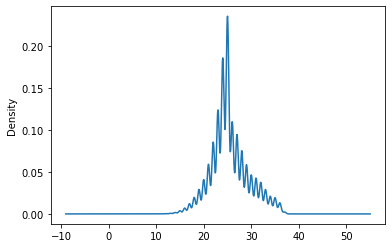

In [13]:
data.sample(frac=0.05, replace=False, random_state=1)['n_atoms'].plot.density()

<AxesSubplot:ylabel='Density'>

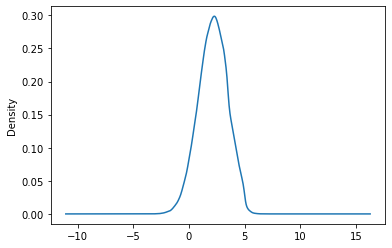

In [11]:
data.sample(frac=0.05, replace=False, random_state=1)['logp'].plot.density()

In [ ]:
## number of unique MolFormula
len(data['MolFormula'].unique())

## Work on word list and test it

In [47]:
sum(data['smiles'].str.contains('8',regex=False))

13

In [63]:
word_list = ['C','c','N','n','O','o','H','[',']','(',')','-','+','=','@','/','\\','#','$','&']
word_list += list(string.digits)
stoi = { ch:i for i,ch in enumerate(word_list) }
itos = { i:ch for i,ch in enumerate(word_list) }
## % and $ and * and & are not in the dataset

In [59]:
def tokenize_smiles(smiles, molecular_formula, stoi, block_size = None, stop_token = '$', split_token = '&'):
    chunk = molecular_formula + split_token + smiles + stop_token
    if block_size is not None:
        chunk = chunk + stop_token*(block_size - len(chunk))
    data = [stoi[s] for s in chunk]
    return data

In [71]:
for idx in range(len(data)):
    try:
        truc = tokenize_smiles(data['smiles'][idx],data['MolFormula'][idx], stoi, block_size=140)
    except:
        print('error in tokenize_smiles: idx = ' + str(idx))
        print(data['smiles'][idx])
    if idx % 1000000 == 0:
        print(idx)

0
error in tokenize_smiles: idx = 905932
CC(C)C(C)(C)Cn1c(-c2cccn2C)nnc1N1CCC[C@H]1C
1000000
error in tokenize_smiles: idx = 1318324
Cc1cc(C(=O)N[C@@]2(C)CCN(C(=O)[C@@H]3CCCNC3=O)C2)oc1C
error in tokenize_smiles: idx = 1330890
CN(C)c1ccc(C(=O)N(C)C2CN(C(=O)C[C@H]3C=CCC3)C2)nn1
2000000
3000000
4000000
5000000
6000000
7000000
8000000


## Deal with train_test_split

In [133]:
MolForm_train = list(pd.Series(data['MolFormula'].unique()).sample(frac = 0.998,random_state = 1))
data['train'] = data['MolFormula'].isin(MolForm_train)
data['train'].value_counts()#.plot.bar()

True     8605866
False      53597
Name: train, dtype: int64

In [99]:
data

,smiles,mwt,logp,n_atoms,MolFormula,l,CHNO,l_MolFormula,l_chunk,train
0,O=C(CCCC(=O)N1CC(=O)Nc2ccccc21)NCCc1cc(O)c(O)cc1O,413.430,1.618,30.0,C21H23N3O6,49.0,True,10,61.0,True
1,CC(C)(C)OC(=O)N1CCC2(CC1)CN(Cc1c(O)cc(O)cc1O)C...,407.467,1.505,29.0,C20H29N3O6,53.0,True,10,65.0,True
2,COc1cc(CN2CCN(C(=O)[C@H]3COc4ccccc4O3)CC2)c(O)...,414.458,1.894,30.0,C22H26N2O6,53.0,True,10,65.0,True
3,COc1ccc(N2CCN(CCN3C(=O)N[C@@H]([C@@H]4CCCOC4)C...,402.495,1.164,29.0,C21H30N4O4,57.0,True,10,69.0,True
4,CN1CCOc2cc(CN3C[C@@H]4COC[C@@H](C(=O)N5CCCCO5)...,401.507,1.764,29.0,C22H31N3O4,61.0,True,10,73.0,True
...,...,...,...,...,...,...,...,...,...,...
8659458,CCC[C@H](OC)c1noc(C(C)(C)c2ccc([N+](=O)[O-])cc...,319.361,3.791,23.0,C16H21N3O4,50.0,True,10,62.0,True
8659459,COc1ccc([N+](=O)[O-])cc1Nc1ccnn1-c1cccc(C)c1,324.340,3.841,24.0,C17H16N4O3,44.0,True,10,56.0,True
8659460,COc1cccc(N[C@@H]2CCO[C@@H](C(C)(C)C)C2)c1[N+](...,308.378,3.609,22.0,C16H24N2O4,53.0,True,10,65.0,True
8659461,CCC[C@@H]1CCCCN1C(=O)CCc1cccc([N+](=O)[O-])c1,304.390,3.709,22.0,C17H24N2O3,45.0,True,10,57.0,True


## save the final file, we are ready for training

In [92]:
data.columns

Index(['smiles', 'mwt', 'logp', 'n_atoms', 'MolFormula', 'l', 'CHNO',
       'l_MolFormula', 'l_chunk', 'train'],
      dtype='object')

In [134]:
data = data[['smiles', 'mwt', 'logp', 'n_atoms',
       'MolFormula', 'l', 'CHNO', 'l_MolFormula', 'l_chunk', 'train']]

In [135]:
data.to_csv(data_path + '/10pc_cleaned.csv',index = False)